In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(34)

In [2]:
## load csv
df = pd.read_csv('dataSepsis.csv',sep=';',  na_values = ['no info', '.'])

In [3]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
count,35506.000000,34736.000000,17101.000000,34617.000000,34846.000000,27917.000000,33890.000000,1613.000000,7184.000000,16984.000000,...,31460.000000,2141.000000,31469.000000,36302.000000,36302.000000,22221.000000,22221.000000,36302.000000,36302.000000,36302.000000
mean,83.547246,97.444337,36.824187,122.625064,82.263649,63.793506,18.041841,32.402046,-0.306508,24.255841,...,11.094782,294.154367,208.785297,61.676240,0.559363,0.495072,0.504928,-51.437230,16.982315,0.072916
std,17.486670,2.827282,0.855630,23.092558,16.876642,14.130816,5.020912,7.947214,4.151943,4.150083,...,6.939193,154.603297,101.953073,16.454453,0.496470,0.499987,0.499987,136.981879,22.731072,0.260002
min,26.000000,27.000000,26.670000,32.000000,20.000000,22.000000,1.000000,10.000000,-29.000000,5.000000,...,0.100000,34.000000,2.000000,14.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000
25%,71.000000,96.000000,36.300000,106.000000,71.000000,54.000000,15.000000,28.000000,-2.000000,22.000000,...,7.400000,188.000000,143.000000,51.000000,0.000000,0.000000,0.000000,-43.510000,6.000000,0.000000
50%,82.000000,98.000000,36.800000,120.000000,80.000000,62.000000,18.000000,33.000000,0.000000,24.000000,...,10.050000,252.000000,193.000000,63.150000,1.000000,0.000000,1.000000,-6.060000,11.000000,0.000000
75%,94.000000,100.000000,37.390000,137.000000,91.330000,72.000000,20.500000,37.500000,2.000000,26.000000,...,13.400000,364.000000,255.000000,74.000000,1.000000,1.000000,1.000000,-0.040000,20.000000,0.000000
max,184.000000,100.000000,41.800000,281.000000,291.000000,281.000000,59.000000,97.000000,36.000000,55.000000,...,387.000000,1051.000000,2322.000000,100.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


In [4]:
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,NaN,NaN,NaN,NaN,30.0,NaN,21.0,45.0,...,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,17,0
1,58.0,95.0,36.11,143.0,77.0,47.0,11.0,NaN,NaN,22.0,...,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,10,0
2,91.0,94.0,38.50,133.0,74.0,48.0,34.0,NaN,NaN,31.0,...,8.3,NaN,465.0,45.82,0,1.0,0.0,-1195.71,11,0
3,92.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,...,12.0,NaN,298.0,52.01,1,1.0,0.0,-0.03,13,0
4,155.5,94.5,NaN,147.5,102.0,NaN,33.0,NaN,-12.0,13.0,...,9.3,NaN,26.0,64.24,1,1.0,0.0,-0.05,2,0


In [5]:
df.dtypes

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender              

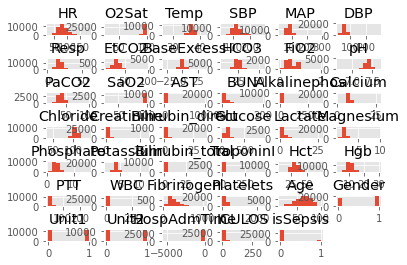

In [6]:
df.hist()
plt.subplots_adjust(hspace=2) 

In [7]:
# get names of indexes for which respiratory rate is less than or equal to 10 and assign to variable
# column Age has value 21
rr_index_names = df[ df['Resp'] <=10 ].index
print(df.loc[rr_index_names])

# drop these row indexes
# from dataFrame
df.drop(rr_index_names, inplace = True)

          HR  O2Sat   Temp    SBP    MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
28      70.0  100.0    NaN  104.0   67.0  50.0  10.0    NaN         6.0  33.0   
56      80.0  100.0  35.28  113.5   81.5  62.5  10.0    NaN         0.0  27.0   
68     117.0   99.0    NaN  118.0   96.0  73.0  10.0    NaN        -2.0  22.0   
93      74.0   96.0  37.20  102.0   62.0  46.0  10.0    NaN         6.0  28.0   
96      80.0   96.0  36.89  109.0   79.0   NaN   5.0    NaN         NaN  27.0   
...      ...    ...    ...    ...    ...   ...   ...    ...         ...   ...   
36218  100.0   97.0    NaN  164.0  121.0  97.0  10.0    NaN         NaN   NaN   
36227   75.0   95.0    NaN  110.0   76.0  55.0  10.0    NaN         NaN   NaN   
36247   76.0   99.0  36.60  104.0   76.0  61.0   9.5    NaN         NaN   NaN   
36251   62.0  100.0    NaN   97.0   60.0  42.0   1.0    NaN         NaN   NaN   
36274   89.0   94.0    NaN  113.0   77.0  65.0  10.0    NaN         NaN   NaN   

       ...   WBC  Fibrinoge

In [8]:
# get names of indexes for which column SBP is less than or equal to 80 and assign to a variable
sbp_index_names = df[ df['SBP'] <=80 ].index
print(df.loc[sbp_index_names])

# drop these row indexes
# from dataFrame
df.drop(sbp_index_names, inplace = True)
  

          HR  O2Sat   Temp   SBP   MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
21      89.0   96.0    NaN  73.5  55.0  46.0  14.0    NaN         NaN  25.0   
100    125.0    NaN    NaN  60.0  56.0  54.0  28.0    NaN       -22.0   8.0   
105    100.0   95.0  36.22  80.0  61.0  49.0  15.0    NaN         NaN  29.0   
273     94.0   94.0  37.80  79.0  56.0  45.0  20.5    NaN         0.0  23.0   
529    144.0   90.0  39.30  63.0  46.0  35.0  31.0    NaN       -11.0  16.0   
...      ...    ...    ...   ...   ...   ...   ...    ...         ...   ...   
35997   85.0   97.0  36.10  80.0  60.0  54.0  11.0    NaN         NaN   NaN   
36014   92.0  100.0  35.40  76.0  65.0  57.0  14.0   33.0         NaN   NaN   
36143   78.0   96.0    NaN  72.0  57.0  50.0  20.0    NaN         NaN   NaN   
36256   79.0   96.0    NaN  79.0  59.0  49.0  32.0    NaN         NaN   NaN   
36290   66.0   98.0    NaN  77.0  56.0  45.0  13.0    NaN         NaN   NaN   

       ...   WBC  Fibrinogen  Platelets    Age  Gen

In [9]:
# get names of indexes for which column DBP is less than or equal to 40 and assign to a variable
dbp_index_names = df[ df['DBP'] <=40 ].index
print(df.loc[dbp_index_names])  

# drop these row indexes
# from dataFrame
df.drop(dbp_index_names, inplace = True)

         HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
91     84.0   93.0   NaN   85.5  51.0  36.0  15.0    NaN         NaN  20.0   
561    91.0  100.0  36.7   97.0  59.0  38.0  20.0    NaN        -3.0  23.0   
683    74.0   97.0  37.3   97.0  60.0  35.0  14.0    NaN        -4.0  22.0   
717    76.0   98.0   NaN  109.0  55.0  33.0  15.0    NaN         3.0  26.0   
733    74.0   99.0  37.6  101.0  57.0  33.0  16.0    NaN         NaN  27.0   
...     ...    ...   ...    ...   ...   ...   ...    ...         ...   ...   
35544  93.5  100.0   NaN  127.0  57.0  40.0  14.0   37.0         NaN   NaN   
35574  70.0   94.0   NaN  136.0  56.0  28.0  20.0    NaN         NaN   NaN   
35577  74.0   92.0  36.1  130.0  74.0  38.0  21.0    NaN         NaN   NaN   
35687  72.0   98.0   NaN  134.0  68.0  40.0  19.0    NaN         NaN   NaN   
36110  57.0   92.5   NaN  109.5  56.0  36.0  15.5    NaN         NaN   NaN   

       ...   WBC  Fibrinogen  Platelets     Age  Gender  Unit1 

In [10]:
# get names of indexes for which column O2 Saturation is less than or equal to 75 and assign to a variable
o2_index_names = df[ df['O2Sat'] <=75 ].index
print(df.loc[o2_index_names])

# drop these row indexes
# from dataFrame
df.drop(o2_index_names, inplace = True)

          HR  O2Sat   Temp    SBP     MAP   DBP  Resp  EtCO2  BaseExcess  \
316    102.0   69.0    NaN   97.0   62.00   NaN  23.5    NaN         4.0   
2422    91.0   62.5    NaN  116.0   87.00  71.0  24.0    NaN         6.0   
4610   100.0   66.0  36.44  105.0   71.50  49.0  15.0    NaN        -1.0   
5290    73.0   43.0    NaN  122.0   72.00   NaN   NaN    NaN         NaN   
5376    83.0   74.0  37.17  134.0   73.33   NaN  29.0    NaN         NaN   
5643   110.0   57.0    NaN  126.0   79.33   NaN  17.0    NaN         NaN   
5991   116.0   54.0    NaN  160.0  115.00  85.0  24.0    NaN        -4.0   
7111   125.0   61.0  36.20   92.5   61.00  50.5  21.0    NaN        -4.5   
7443   106.0   70.0    NaN  133.0   98.33   NaN  31.0    NaN         3.0   
7460   111.0   67.0    NaN  117.0   85.00  73.0  21.0    NaN        -3.0   
11876   79.5   27.0    NaN   91.5   65.00  52.0  18.0    NaN       -13.0   
13400  107.0   64.0  35.22    NaN   51.00   NaN  23.0    NaN       -25.0   
13731  124.0

In [11]:
# get names of indexes for which column HR is less than or equal to 40 and assign to a variable
HR_index_names = df[ df['HR'] <=40 ].index
print(df.loc[HR_index_names])

# drop these row indexes
# from dataFrame
df.drop(HR_index_names, inplace = True)

         HR  O2Sat   Temp    SBP     MAP    DBP  Resp  EtCO2  BaseExcess  \
525    39.0   99.0  37.33  155.0   69.00    NaN  25.0    NaN         NaN   
970    39.0  100.0    NaN   98.0   47.00    NaN  17.0    NaN         NaN   
1772   36.0  100.0  31.33  134.0  101.00   79.0  12.0    NaN         8.0   
1983   34.0    NaN  36.17  124.0   73.00    NaN  20.0    NaN         NaN   
2654   39.5   93.0  37.17  108.5   65.50   47.0  19.0    NaN         NaN   
2946   40.0   99.0    NaN  150.0   88.67    NaN  16.0    NaN         NaN   
3047   39.0   97.0    NaN  119.0   75.67    NaN  16.0    NaN         NaN   
3417   38.0  100.0    NaN  121.5   67.50   46.0  19.0    NaN         NaN   
4568   37.0   98.0    NaN  143.0   73.00    NaN  19.0    NaN         NaN   
10695  36.5  100.0  36.06  104.0   56.67    NaN  19.0    NaN         NaN   
12798  40.0  100.0  36.17   96.0   63.00    NaN  23.0    NaN         NaN   
14802  40.0   93.0    NaN  151.0   78.00    NaN  16.0    NaN         NaN   
15225  38.0 

In [12]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
count,33352.00000,32630.000000,15944.000000,32492.000000,32713.000000,26036.000000,31804.000000,1447.000000,6562.000000,15888.000000,...,29668.000000,1989.000000,29643.000000,34144.000000,34144.000000,20817.000000,20817.000000,34144.000000,34144.000000,34144.000000
mean,83.73282,97.458872,36.835544,123.473343,83.001701,64.622410,18.374701,32.477885,-0.254998,24.278380,...,11.062813,294.421569,209.798688,61.492629,0.560684,0.504780,0.495220,-50.475230,16.999151,0.071931
std,17.39851,2.572584,0.844477,22.685035,16.640329,13.728102,4.755963,7.723807,4.096020,4.153652,...,6.977415,153.447543,101.574418,16.492879,0.496311,0.499989,0.499989,134.314572,22.538288,0.258377
min,40.50000,76.000000,26.670000,80.500000,20.000000,40.500000,10.250000,10.000000,-29.000000,5.000000,...,0.100000,34.000000,2.000000,14.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000
25%,71.00000,96.000000,36.300000,107.000000,71.500000,55.000000,15.000000,28.000000,-2.000000,22.000000,...,7.400000,188.000000,144.000000,51.000000,0.000000,0.000000,0.000000,-41.527500,6.000000,0.000000
50%,82.00000,98.000000,36.800000,120.000000,80.500000,63.000000,18.000000,33.000000,0.000000,24.000000,...,10.000000,254.000000,194.000000,63.000000,1.000000,1.000000,0.000000,-5.825000,11.000000,0.000000
75%,94.00000,100.000000,37.390000,137.000000,92.000000,72.000000,21.000000,37.500000,2.000000,26.000000,...,13.300000,364.000000,256.000000,74.000000,1.000000,1.000000,1.000000,-0.040000,20.000000,0.000000
max,184.00000,100.000000,41.800000,281.000000,291.000000,281.000000,59.000000,83.000000,36.000000,55.000000,...,387.000000,1051.000000,2322.000000,100.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


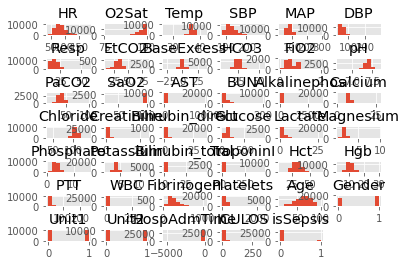

In [13]:
df.hist()
plt.subplots_adjust(hspace=2) 

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)


In [15]:
missing_value_df

,column_name,percent_missing
Bilirubin_direct,Bilirubin_direct,96.854499
EtCO2,EtCO2,95.762067
Fibrinogen,Fibrinogen,94.174672
TroponinI,TroponinI,89.523782
Lactate,Lactate,88.908739
SaO2,SaO2,88.460637
FiO2,FiO2,82.781748
BaseExcess,BaseExcess,80.781396
PaCO2,PaCO2,77.498243
pH,pH,75.339738


In [16]:
df = df.fillna(0)

In [17]:
x = df.drop(['Bilirubin_direct', 'EtCO2', 'Fibrinogen', 'TroponinI', 'Lactate', 'SaO2', 'FiO2', 'Unit2', 'Unit1', 'HospAdmTime','BaseExcess','isSepsis'], axis = 1)

In [18]:
x.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HCO3,pH,PaCO2,...,Potassium,Bilirubin_total,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,ICULOS
count,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,...,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000,34144.000000
mean,81.790563,93.137389,17.200853,117.499293,79.523039,49.276859,17.115423,11.297297,1.819940,9.316360,...,3.697290,0.433615,28.591929,9.479736,13.963002,9.612568,182.142177,61.492629,0.560684,16.999151
std,21.320160,20.219500,18.386852,34.520700,23.279540,29.998489,6.528605,12.437175,3.181305,17.775269,...,1.347438,1.854498,11.539987,4.005909,22.295631,7.499533,118.299665,16.492879,0.496311,22.538288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,1.000000
25%,70.000000,96.000000,0.000000,104.500000,70.000000,43.000000,14.000000,0.000000,0.000000,0.000000,...,3.600000,0.000000,26.400000,8.700000,0.000000,6.000000,115.000000,51.000000,0.000000,6.000000
50%,82.000000,98.000000,0.000000,119.000000,80.000000,58.000000,17.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,30.900000,10.300000,0.000000,9.200000,179.000000,63.000000,1.000000,11.000000
75%,94.000000,100.000000,36.780000,136.000000,91.000000,69.000000,20.000000,24.000000,0.000000,0.000000,...,4.300000,0.400000,35.400000,11.900000,28.200000,12.700000,245.000000,74.000000,1.000000,20.000000
max,184.000000,100.000000,41.800000,281.000000,291.000000,281.000000,59.000000,55.000000,7.670000,100.000000,...,11.800000,46.600000,65.000000,30.000000,250.000000,387.000000,2322.000000,100.000000,1.000000,336.000000


In [19]:
y= df['isSepsis']

In [20]:
y.describe()

count    34144.000000
mean         0.071931
std          0.258377
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: isSepsis, dtype: float64

In [22]:
x2=x.to_numpy()
y2=y.to_numpy()

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_auc_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    x2, y2, test_size=0.33, random_state=42)

training time: 0.014 s
predicting time: 0.009 s
Total Values =  11268

Accuracy = 0.9040646077387291

AUC =  0.8790576614291803

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     10449
           1       0.41      0.77      0.54       819

    accuracy                           0.90     11268
   macro avg       0.70      0.84      0.74     11268
weighted avg       0.94      0.90      0.92     11268



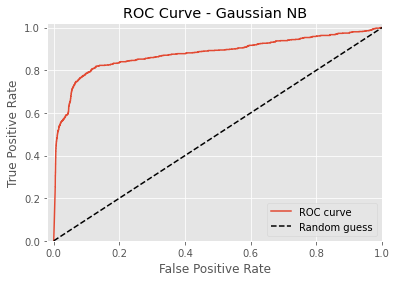

In [25]:
#NB testing on all features unscaled and not normalized

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
clf = GaussianNB()

t0 = time()
clf.fit(X_train,y_train)
print ("training time:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(X_test)

print ("predicting time:", round(time()-t0, 3), "s")
y_pred_prob = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score( y_test, pred)
print("Total Values = ", len(y_test))
print()
print ('Accuracy = {0}'.format(accuracy))
print()
print('AUC = ', auc)
print()
print(classification_report(y_test, pred))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve - Gaussian NB')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
    



In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
#########################################################


def my_svm(features_train, features_test, labels_train, labels_test, kernel='linear', C=1.0):
    # the classifier
    clf = svm.SVC(kernel=kernel, C=C, probability = True)

    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print ("\ntraining time:", round(time()-t0, 3), "s")

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print ("predicting time:", round(time()-t0, 3), "s")
    
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score( y_test, pred)
    print("Total Values = ", len(y_test))
    print()
    print ('Accuracy = {0}'.format(accuracy))
    print()
    print('AUC = ', auc)
    print()
    print(classification_report(y_test, pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # create plot
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('ROC Curve - SVM')
    _ = plt.xlim([-0.02, 1])
    _ = plt.ylim([0, 1.02])
    _ = plt.legend(loc="lower right")
    
   # precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    # create plot
    #plt.plot(precision, recall, label='Precision-recall curve')
    #_ = plt.xlabel('Precision')
    #_ = plt.ylabel('Recall')
    #_ = plt.title('Precision-recall curve')
    #_ = plt.legend(loc="lower left")

 
    return pred

pred = my_svm(X_train, X_test, y_train, y_test, kernel='rbf', C=10000)



In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

t0 = time()
train = clf.fit(X_train,y_train)
print ("training time:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(X_test)
print ("predicting time:", round(time()-t0, 3), "s")

y_pred_prob = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score( y_test, pred)
print("Total Values = ", len(y_test))
print()
print ('Accuracy = {0}'.format(accuracy))
print()
print('AUC = ', auc)
print()
print(classification_report(y_test, pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve - Decision Tree')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
    



In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve."""

   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
#create a univariate selector using KBestFit from sklearn
KBest = SelectKBest(f_classif, k = 15)
fit = KBest.fit(x2,y2)
kfeatures = KBest.fit_transform(x2,y2)

In [ ]:
fscore = KBest.scores_
scores = pd.DataFrame({'Features': x.columns, 'Fscore': KBest.scores_})
scores.sort_values(by = ['Fscore'], ascending = False, inplace=True)
print(scores)


In [ ]:
#resplit data using kbest features
X_train, X_test, y_train, y_test = train_test_split(
    kfeatures, y2, test_size=0.33, random_state=42)

In [ ]:
#repeat classifiers using kbest features

clf = GaussianNB()

t0 = time()
clf.fit(X_train,y_train)
print ("training time:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(X_test)

print ("predicting time:", round(time()-t0, 3), "s")
y_pred_prob = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score( y_test, pred)
print("Total Values = ", len(y_test))
print()
print ('Accuracy = {0}'.format(accuracy))
print()
print('AUC = ', auc)
print()
print(classification_report(y_test, pred))
    
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")


In [ ]:
pred = my_svm(X_train, X_test, y_train, y_test, kernel='rbf', C=10000)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

t0 = time()
train = clf.fit(X_train,y_train)
print ("training time:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(X_test)
print ("predicting time:", round(time()-t0, 3), "s")

y_pred_prob = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score( y_test, pred)
print("Total Values = ", len(y_test))
print()
print ('Accuracy = {0}'.format(accuracy))
print()
print('AUC = ', auc)
print()
print(classification_report(y_test, pred))
    
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")


In [ ]:
#Gaussian NB has the best scores in both instances so we will fine tune this

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


# In[45]:


#set up pipeline to review 
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',GaussianNB())
    ]
)


In [ ]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]},
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    cv=10,
    verbose=3
)

In [ ]:
search.fit(x2,y2)
print('best parameters: ',search.best_params_)
print('best score: ', search.best_score_)
print('best estimator: ', search.best_estimator_)


In [ ]:
#create a univariate selector using KBestFit from sklearn - refitting with 2 features what???
KBest = SelectKBest(f_classif, k = 2)
fit = KBest.fit(x2,y2)
kfeatures = KBest.fit_transform(x2,y2)

In [ ]:
fscore = KBest.scores_
scores = pd.DataFrame({'Features': x.columns, 'Fscore': KBest.scores_})
scores.sort_values(by = ['Fscore'], ascending = False, inplace=True)
print(scores)


In [ ]:
#resplit data using kbest features
X_train, X_test, y_train, y_test = train_test_split(
    kfeatures, y2, test_size=0.33, random_state=42)

In [ ]:
#repeat classifiers using kbest features

clf = GaussianNB()

t0 = time()
clf.fit(X_train,y_train)
print ("training time:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(X_test)

print ("predicting time:", round(time()-t0, 3), "s")
y_pred_prob = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score( y_test, pred)
print("Total Values = ", len(y_test))
print()
print ('Accuracy = {0}'.format(accuracy))
print()
print('AUC = ', auc)
print()
print(classification_report(y_test, pred))
    
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")
